In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from tabulate import tabulate
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [13]:
train = pd.read_csv('Lab-CSE1015-Data_Regression-test.csv')

## Exploring Data

### 1. Question 1 - pre-processing 

In [14]:
train.head(10)

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,5,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.027,NaN,NaN
1,10,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.003,NaN,NaN
2,15,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.012,NaN,NaN
3,20,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,NaN,0.026,NaN,NaN
4,25,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,NaN,0.025,NaN,NaN
5,30,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,NaN,0.026,NaN,NaN
6,35,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,NaN,0.022,NaN,NaN
7,40,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,NaN,0.025,NaN,NaN
8,45,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,NaN,0.004,NaN,NaN
9,50,0.01,0.0483,0.8728,0.000435,0.01,0.0682,0.9513,0.000817,NaN,0.013,NaN,NaN


In [15]:
train.describe

<bound method NDFrame.describe of     Sample No    P1      P2      P3        P4    P5      P6      P7        P8  \
0           5  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
1          10  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
2          15  0.01  0.0483  0.8728  0.000435  0.01  0.0483  0.8728  0.000435   
3          20  0.01  0.0483  0.8728  0.000435  0.01  0.0529  0.9350  0.000539   
4          25  0.01  0.0483  0.8728  0.000435  0.01  0.0529  0.9350  0.000539   
5          30  0.01  0.0483  0.8728  0.000435  0.01  0.0529  0.9350  0.000539   
6          35  0.01  0.0483  0.8728  0.000435  0.01  0.0575  0.9470  0.000694   
7          40  0.01  0.0483  0.8728  0.000435  0.01  0.0575  0.9470  0.000694   
8          45  0.01  0.0483  0.8728  0.000435  0.01  0.0575  0.9470  0.000694   
9          50  0.01  0.0483  0.8728  0.000435  0.01  0.0682  0.9513  0.000817   
10         55  0.01  0.0483  0.8728  0.000435  0.01  0.0682  0.9513  0.0008

<AxesSubplot:>

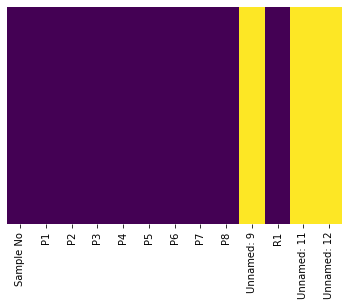

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
train.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'Unnamed: 9', 'R1', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

## Preprocessing 

In [18]:
train = train.drop(columns=['Unnamed: 9'])
train = train.drop(columns=['Unnamed: 11'])
train = train.drop(columns=['Unnamed: 12'])

In [19]:
train.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'R1'], dtype='object')

In [20]:
train.dropna(inplace=True)

<AxesSubplot:>

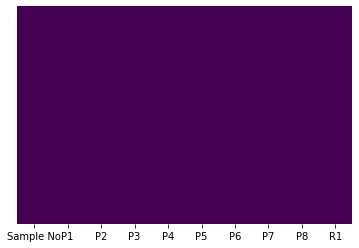

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
test = pd.read_csv('Lab-CSE1015-Data_Regression-train.csv') 

In [23]:
test.head(10)

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,1.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.023,NaN,NaN
1,2.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.008,NaN,NaN
2,3.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.014,NaN,NaN
3,4.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.011,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.007,NaN,NaN
6,7.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.027,NaN,NaN
7,8.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.029,NaN,NaN
8,9.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.015,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample No    80 non-null     float64
 1   P1           80 non-null     float64
 2   P2           80 non-null     float64
 3   P3           80 non-null     float64
 4   P4           80 non-null     float64
 5   P5           80 non-null     float64
 6   P6           80 non-null     float64
 7   P7           80 non-null     float64
 8   P8           80 non-null     float64
 9   Unnamed: 9   0 non-null      float64
 10  R1           80 non-null     float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(13)
memory usage: 10.2 KB


In [25]:
test.describe()

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
count,80.000000,80.00,80.000000,80.000000,80.000000,80.00,80.000000,80.000000,80.000000,0.0,80.000000,0.0,0.0
mean,50.000000,0.01,0.049910,0.894570,0.000471,0.01,0.054869,0.920611,0.000583,NaN,0.015900,NaN,NaN
std,29.035116,0.00,0.002208,0.029855,0.000050,0.00,0.006751,0.032978,0.000138,NaN,0.007653,NaN,NaN
min,1.000000,0.01,0.048300,0.872800,0.000435,0.01,0.048300,0.872800,0.000435,NaN,0.002000,NaN,NaN
25%,25.500000,0.01,0.048300,0.872800,0.000435,0.01,0.048300,0.872800,0.000435,NaN,0.009750,NaN,NaN
50%,50.000000,0.01,0.048300,0.872800,0.000435,0.01,0.052900,0.935000,0.000539,NaN,0.016000,NaN,NaN
75%,74.500000,0.01,0.052900,0.935000,0.000539,0.01,0.057500,0.947000,0.000694,NaN,0.022000,NaN,NaN
max,99.000000,0.01,0.052900,0.935000,0.000539,0.01,0.068200,0.951300,0.000817,NaN,0.030000,NaN,NaN


In [26]:
test.isnull().sum()

Sample No      19
P1             19
P2             19
P3             19
P4             19
P5             19
P6             19
P7             19
P8             19
Unnamed: 9     99
R1             19
Unnamed: 11    99
Unnamed: 12    99
dtype: int64

In [27]:
test = test.dropna(how='all')
test

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,1.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.023,NaN,NaN
1,2.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.008,NaN,NaN
2,3.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.014,NaN,NaN
3,4.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.011,NaN,NaN
5,6.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.007,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94.0,0.01,0.0529,0.9350,0.000539,0.01,0.0529,0.9350,0.000539,NaN,0.020,NaN,NaN
95,96.0,0.01,0.0529,0.9350,0.000539,0.01,0.0529,0.9350,0.000539,NaN,0.002,NaN,NaN
96,97.0,0.01,0.0529,0.9350,0.000539,0.01,0.0575,0.9470,0.000694,NaN,0.013,NaN,NaN
97,98.0,0.01,0.0529,0.9350,0.000539,0.01,0.0575,0.9470,0.000694,NaN,0.018,NaN,NaN


In [28]:
test = test.drop(columns=['Unnamed: 9','Unnamed: 11','Unnamed: 12'])

In [29]:
test

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,R1
0,1.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.023
1,2.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.008
2,3.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.014
3,4.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.011
5,6.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,0.007
...,...,...,...,...,...,...,...,...,...,...
93,94.0,0.01,0.0529,0.9350,0.000539,0.01,0.0529,0.9350,0.000539,0.020
95,96.0,0.01,0.0529,0.9350,0.000539,0.01,0.0529,0.9350,0.000539,0.002
96,97.0,0.01,0.0529,0.9350,0.000539,0.01,0.0575,0.9470,0.000694,0.013
97,98.0,0.01,0.0529,0.9350,0.000539,0.01,0.0575,0.9470,0.000694,0.018


Normalisation using MinMaxScaler from sklearn 

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = train.columns
temp = scaler.fit_transform(train)
train = pd.DataFrame(temp,columns=cols)

In [31]:
train.head(20)

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,R1
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.962963
1,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.074074
2,0.105263,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.407407
3,0.157895,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.925926
4,0.210526,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.888889
5,0.263158,0.0,0.0,0.0,0.0,0.0,0.231156,0.792357,0.272251,0.925926
6,0.315789,0.0,0.0,0.0,0.0,0.0,0.462312,0.945223,0.678010,0.777778
7,0.368421,0.0,0.0,0.0,0.0,0.0,0.462312,0.945223,0.678010,0.888889
8,0.421053,0.0,0.0,0.0,0.0,0.0,0.462312,0.945223,0.678010,0.111111
9,0.473684,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.444444


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample No  20 non-null     float64
 1   P1         20 non-null     float64
 2   P2         20 non-null     float64
 3   P3         20 non-null     float64
 4   P4         20 non-null     float64
 5   P5         20 non-null     float64
 6   P6         20 non-null     float64
 7   P7         20 non-null     float64
 8   P8         20 non-null     float64
 9   R1         20 non-null     float64
dtypes: float64(10)
memory usage: 1.7 KB


<AxesSubplot:>

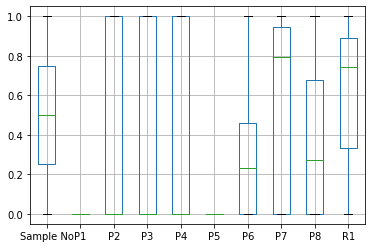

In [33]:
train.boxplot()

the conversion of ```train``` using a function which fits (figures out the params) then normalises. Whilst the ```test``` conversion just transforms, using the same params that it learned from the train data.

In [34]:
cols = test.columns
temp2 = scaler.fit_transform(test)
test = pd.DataFrame(temp2,columns=cols)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample No  80 non-null     float64
 1   P1         80 non-null     float64
 2   P2         80 non-null     float64
 3   P3         80 non-null     float64
 4   P4         80 non-null     float64
 5   P5         80 non-null     float64
 6   P6         80 non-null     float64
 7   P7         80 non-null     float64
 8   P8         80 non-null     float64
 9   R1         80 non-null     float64
dtypes: float64(10)
memory usage: 6.4 KB


<b> The null values have therefore been removed and the test and training data have been scaled using the MinMax scaling from sklearn. 

## Correlation
### 2. Question - 2 Find correlation

In [36]:
correlation = train.corr()
correlation['R1']

Sample No   -0.181316
P1                NaN
P2          -0.179137
P3          -0.179137
P4          -0.179137
P5                NaN
P6           0.015168
P7           0.169954
P8           0.001838
R1           1.000000
Name: R1, dtype: float64

<AxesSubplot:>

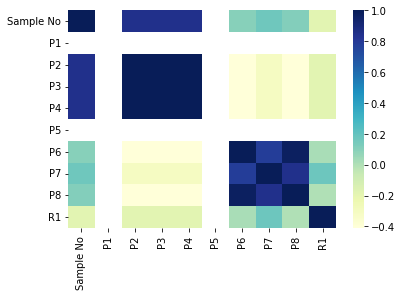

In [37]:
sns.heatmap(correlation, cmap='YlGnBu')

<b>The Factors chosen: P2,P3,P4 (as they have a significant Negative correlation)and P6,P7 ( as they have a significant positive correlation)

In [38]:
train = train.drop(columns=['P8','P1','P5'])

In [39]:
correlation = train.corr()

<AxesSubplot:>

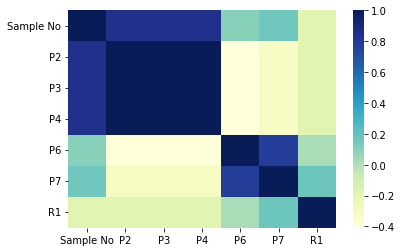

In [40]:
sns.heatmap(correlation, cmap='YlGnBu')

## Regression Model
### 3. Question 3 - Build the regression Model

In [41]:
from sklearn.linear_model import LinearRegression
x = train[['P2','P3','P4','P6','P7']]
y = train['R1']

In [42]:
x.head()

,P2,P3,P4,P6,P7
0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.231156,0.792357
4,0.0,0.0,0.0,0.231156,0.792357


In [43]:
y.head()

0    0.962963
1    0.074074
2    0.407407
3    0.925926
4    0.888889
Name: R1, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x,y)

LinearRegression()

In [45]:
regression_model.intercept_

0.5845762882166986

In [46]:
coefficients = pd.DataFrame(regression_model.coef_, x.columns, columns = ['coefficients'])
coefficients

,coefficients
P2,-0.049933
P3,-0.049933
P4,-0.049933
P6,-0.410533
P7,0.333315


In [47]:
reg_equation = "Y = " + str(regression_model.intercept_.round(3)) + " + " +  "(" + str(coefficients.coefficients['P2'].round(5)) + ")" + x.columns[0]
for i in range(1, len(x.columns)):
    col = x.columns[i]
    reg_equation += " + (" + str(coefficients.coefficients[col].round(5)) + ")" + col
reg_equation

'Y = 0.585 + (-0.04993)P2 + (-0.04993)P3 + (-0.04993)P4 + (-0.41053)P6 + (0.33331)P7'

<b> The regression equation is thus obtainted. From the observed equation, it is apparant that the features present in the training data set namely P2, P3, P4, P6 move in opposite direction in contrast to the target variable R1 as they are negatively correlated. 

the variables P7 move in the same direction as compared to Y since they have the positive correlation coefficient. 
the intercept is the expected mean value of the target valirable R1 when all other variables = 0. Thus the estimated mean here would be 0.584576288216699


## iv) Using p values to eliminate variables


In [48]:
import statsmodels.api as sm 
from statsmodels.api import OLS

x_train = np.column_stack((x['P2'],x['P3'],x['P4'],x['P6'],x['P7'])) 
y_train = y
x_train = sm.add_constant(x_train)
estimate = OLS(y_train, x_train).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.6159
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.615
Time:                        23:50:06   Log-Likelihood:                -5.8180
No. Observations:                  20   AIC:                             19.64
Df Residuals:                      16   BIC:                             23.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5846      0.172      3.404      0.0

Based off of the P Values, we drop the ones with the highest p values and so 'P2' is dropped.

In [49]:
x = x.drop(columns='P2')

In [50]:
x_train = np.column_stack((x['P7'],x['P3'],x['P4'],x['P6'])) 
y_train = y
x_train = sm.add_constant(x_train)
estimate = OLS(y_train, x_train).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.6159
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.615
Time:                        23:50:06   Log-Likelihood:                -5.8180
No. Observations:                  20   AIC:                             19.64
Df Residuals:                      16   BIC:                             23.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5846      0.172      3.404      0.0

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,P3,inf
1,P4,inf
2,P6,5.257414
3,P7,5.824268


In [52]:
x = x.drop(columns='P3')

In [53]:
vif  = pd.DataFrame()
vif['variables'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,P4,1.263437
1,P6,5.257414
2,P7,5.824268


In [54]:
x_train = np.column_stack((x['P7'],x['P4'],x['P6'])) 
y_train = y
x_train = sm.add_constant(x_train)
estimate = OLS(y_train, x_train).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.6159
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.615
Time:                        23:50:06   Log-Likelihood:                -5.8180
No. Observations:                  20   AIC:                             19.64
Df Residuals:                      16   BIC:                             23.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5846      0.172      3.404      0.0

Having a high VIF suggests that they can be predicted by other independent variables in the dataset. And so P3 was dropped. 

In [55]:
print("Regression Equation: ")
print(f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})P4 + ({regression_model.coef_[1].round(3)})P6 + ({regression_model.coef_[2].round(3)})P7")

Regression Equation: 
Y = 0.585+ (-0.05)P4 + (-0.05)P6 + (-0.05)P7


Dropping other variables improves the R-Squared however, this has not been reflected in the metrics

## Final model 
### 5. Question - 5

In [56]:
regression_model.fit(x,y)

LinearRegression()

In [57]:
regression_model.intercept_

0.5845762882166986

Final equation

In [67]:
yx = f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})P4 + ({regression_model.coef_[1].round(3)})P6 + ({regression_model.coef_[2].round(3)})P7"
print(yx)

Y = 0.585+ (-0.15)P4 + (-0.411)P6 + (0.333)P7


In [59]:
import statsmodels.api as sm
result = sm.OLS(y, x).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     R1   R-squared (uncentered):                   0.610
Model:                            OLS   Adj. R-squared (uncentered):              0.542
Method:                 Least Squares   F-statistic:                              8.879
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                    0.000917
Time:                        23:50:07   Log-Likelihood:                         -11.266
No. Observations:                  20   AIC:                                      28.53
Df Residuals:                      17   BIC:                                      31.52
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Vi)

PLOT P4

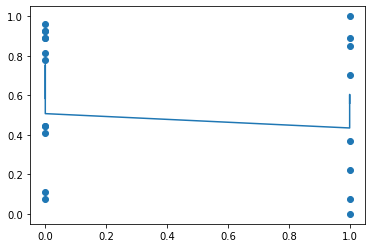

In [60]:
import matplotlib.pyplot as plt
plt.scatter(x['P4'],y)
eq = x*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(x['P4'], eq)

PLOT P6

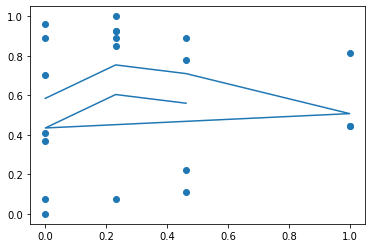

In [61]:
plt.scatter(x['P6'],y)
eq = x*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(x['P6'], eq)

PLOT P7

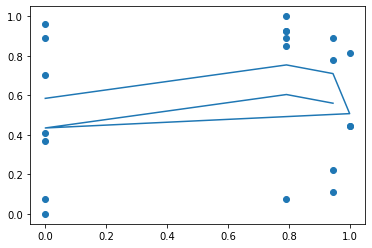

In [62]:
plt.scatter(x['P7'],y)
eq = x*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(x['P7'], eq)

## Vii) Predictions

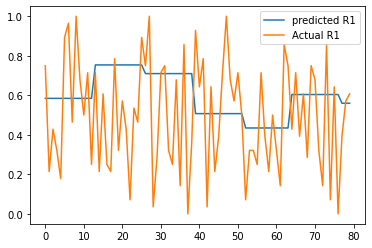

In [63]:
x_test = test[['P4','P6','P7']]
y_test = test['R1']

n = np.arange(x_test.shape[0])

results = regression_model.predict(x_test)
plt.plot(n,results,label='predicted R1')

plt.plot(n,y_test,label='Actual R1')
plt.legend()

In [64]:
test.reset_index(inplace=True)
tabulation = pd.DataFrame()
tabulation['predicted R1'] = results 
tabulation['Actual R1'] = test['R1']
tabulation

,predicted R1,Actual R1
0,0.584576,0.750000
1,0.584576,0.214286
2,0.584576,0.428571
3,0.584576,0.321429
4,0.584576,0.178571
...,...,...
75,0.603985,0.642857
76,0.603985,0.000000
77,0.560041,0.392857
78,0.560041,0.571429


In [65]:
MAE = metrics.mean_absolute_error(y_test,results)
MSE = metrics.mean_squared_error(y_test,results)
RMSE = np.sqrt(MSE)
R_squared = estimate.rsquared
adjusted_R_squared = estimate.rsquared_adj

In [68]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[x.columns[0],x.columns[1]], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                                           MSE       MAE      RMSE    R-Squared    Adjusted R-Squared
----------------------  ---------------------------------------------  ---------  --------  --------  -----------  --------------------
['P4', 'P6']            Y = 0.585+ (-0.15)P4 + (-0.411)P6 + (0.333)P7  0.0972559  0.254841  0.311859     0.103531            -0.0645566
